In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("energydata_complete.csv")

In [3]:
pd.reset_option('display.max_columns')
pd.reset_option('display.precision')

pd.set_option('display.max_columns',50)
pd.set_option('display.precision',1)

pd.reset_option('display.max_rows')
pd.reset_option('display.precision')

pd.set_option('display.max_rows',1000)
pd.set_option('display.precision',1)

In [4]:
df.head(200)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,5.3,13.3,13.3
1,2016-01-11 17:10:00,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,5.2,18.6,18.6
2,2016-01-11 17:20:00,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,5.1,28.6,28.6
3,2016-01-11 17:30:00,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5,5.0,45.4,45.4
4,2016-01-11 17:40:00,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,4.9,10.1,10.1
5,2016-01-11 17:50:00,50,40,19.9,46.0,19.2,44.5,19.8,44.9,18.9,45.7,17.1,55.0,6.3,85.8,17.1,41.3,18.1,48.6,17.0,45.3,6.0,734.0,92.0,5.3,43.8,4.8,44.9,44.9
6,2016-01-11 18:00:00,60,50,19.9,45.8,19.2,44.5,19.8,44.9,18.9,45.8,17.1,55.0,6.3,86.1,17.1,41.2,18.1,48.6,17.0,45.3,5.9,734.1,92.0,5.0,40.0,4.7,47.2,47.2
7,2016-01-11 18:10:00,60,50,19.9,45.6,19.2,44.5,19.7,44.9,18.9,45.9,17.1,54.9,6.2,86.4,17.1,41.2,18.1,48.6,17.0,45.3,5.9,734.2,91.8,5.2,40.0,4.7,33.0,33.0
8,2016-01-11 18:20:00,60,40,19.8,45.6,19.2,44.4,19.7,44.8,18.9,45.8,17.2,55.0,6.1,87.2,17.2,41.4,18.1,48.6,17.0,45.3,5.9,734.2,91.7,5.3,40.0,4.7,31.5,31.5
9,2016-01-11 18:30:00,70,40,19.9,46.1,19.2,44.4,19.8,44.9,18.9,46.1,17.1,55.0,6.2,87.6,17.2,41.5,18.1,48.6,17.0,45.3,6.0,734.3,91.5,5.5,40.0,4.7,3.1,3.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.7,102.5,1.0e+01,50.0,60.0,100.0,1080.0
lights,19735.0,3.8,7.9,0.0e+00,0.0,0.0,0.0,70.0
T1,19735.0,21.7,1.6,1.7e+01,20.8,21.6,22.6,26.3
RH_1,19735.0,40.3,4.0,2.7e+01,37.3,39.7,43.1,63.4
T2,19735.0,20.3,2.2,1.6e+01,18.8,20.0,21.5,29.9
RH_2,19735.0,40.4,4.1,2.0e+01,37.9,40.5,43.3,56.0
T3,19735.0,22.3,2.0,1.7e+01,20.8,22.1,23.3,29.2
RH_3,19735.0,39.2,3.3,2.9e+01,36.9,38.5,41.8,50.2
T4,19735.0,20.9,2.0,1.5e+01,19.5,20.7,22.1,26.2
RH_4,19735.0,39.0,4.3,2.8e+01,35.5,38.4,42.2,51.1


In [7]:
Colum_names = {
    'Appliances': 'Appliance_Wh',
    'lights': 'lights_Wh',
    'T1': 'T_kitchen',
    'RH_1': 'H_kitchen',
    'T2': 'T_living',
    'RH_2': 'H_living',
    'T3': 'T_laundry',
    'RH_3': 'H_laundry',
    'T4': 'T_office',
    'RH_4': 'H_office',
    'T5': 'T_bathroom',
    'RH_5': 'H_bathroom',
    'T6': 'T_outside_north',
    'RH_6': 'H_outside_north',
    'T7': 'T_ironing_room',
    'RH_7': 'H_ironing_room',
    'T8': 'T_room_2',
    'RH_8': 'H_room_2',
    'T9': 'T_room_1',
    'RH_9': 'H_room_1',
    'T_out': 'T_outside_weather_station',
    'Press_mm_hg': 'Pressure_mm_Hg',
    'RH_out': 'H_outside_weather_station',
    'Windspeed': 'Wind_speed_m/s',
    'Visibility': 'Visibility_km',}

df.rename(columns=Colum_names, inplace=True)

In [8]:
df

,date,Appliance_Wh,lights_Wh,T_kitchen,H_kitchen,T_living,H_living,T_laundry,H_laundry,T_office,H_office,T_bathroom,H_bathroom,T_outside_north,H_outside_north,T_ironing_room,H_ironing_room,T_room_2,H_room_2,T_room_1,H_room_1,T_outside_weather_station,Pressure_mm_Hg,H_outside_weather_station,Wind_speed_m/s,Visibility_km,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,5.3,13.3,13.3
1,2016-01-11 17:10:00,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,5.2,18.6,18.6
2,2016-01-11 17:20:00,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,5.1,28.6,28.6
3,2016-01-11 17:30:00,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5,5.0,45.4,45.4
4,2016-01-11 17:40:00,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,4.9,10.1,10.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.6,46.6,25.9,42.0,27.2,41.2,24.7,45.6,23.2,52.4,24.8,1.0,24.5,44.5,24.7,50.1,23.2,46.8,22.7,755.2,55.7,3.3,23.7,13.3,43.1,43.1
19731,2016-05-27 17:30:00,90,0,25.5,46.5,25.8,42.1,27.1,41.2,24.7,45.6,23.2,52.3,24.2,1.0,24.6,44.4,24.7,49.8,23.2,46.8,22.6,755.2,56.0,3.5,24.5,13.3,49.3,49.3
19732,2016-05-27 17:40:00,270,10,25.5,46.6,25.6,42.8,27.1,41.7,24.7,45.7,23.2,52.3,23.6,1.0,24.5,44.4,24.7,49.7,23.2,46.8,22.5,755.2,56.3,3.7,25.3,13.3,29.2,29.2
19733,2016-05-27 17:50:00,420,10,25.5,47.0,25.4,43.0,26.9,41.3,24.7,45.8,23.2,52.2,22.4,1.0,24.5,44.3,24.7,49.5,23.2,46.8,22.3,755.2,56.7,3.8,26.2,13.2,6.3,6.3


In [9]:
df.drop(['Tdewpoint','rv1','rv2','date'], axis=1, inplace=True)


In [10]:
df

,Appliance_Wh,lights_Wh,T_kitchen,H_kitchen,T_living,H_living,T_laundry,H_laundry,T_office,H_office,T_bathroom,H_bathroom,T_outside_north,H_outside_north,T_ironing_room,H_ironing_room,T_room_2,H_room_2,T_room_1,H_room_1,T_outside_weather_station,Pressure_mm_Hg,H_outside_weather_station,Wind_speed_m/s,Visibility_km
0,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0
1,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2
2,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3
3,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5
4,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.6,46.6,25.9,42.0,27.2,41.2,24.7,45.6,23.2,52.4,24.8,1.0,24.5,44.5,24.7,50.1,23.2,46.8,22.7,755.2,55.7,3.3,23.7
19731,90,0,25.5,46.5,25.8,42.1,27.1,41.2,24.7,45.6,23.2,52.3,24.2,1.0,24.6,44.4,24.7,49.8,23.2,46.8,22.6,755.2,56.0,3.5,24.5
19732,270,10,25.5,46.6,25.6,42.8,27.1,41.7,24.7,45.7,23.2,52.3,23.6,1.0,24.5,44.4,24.7,49.7,23.2,46.8,22.5,755.2,56.3,3.7,25.3
19733,420,10,25.5,47.0,25.4,43.0,26.9,41.3,24.7,45.8,23.2,52.2,22.4,1.0,24.5,44.3,24.7,49.5,23.2,46.8,22.3,755.2,56.7,3.8,26.2


## EDA

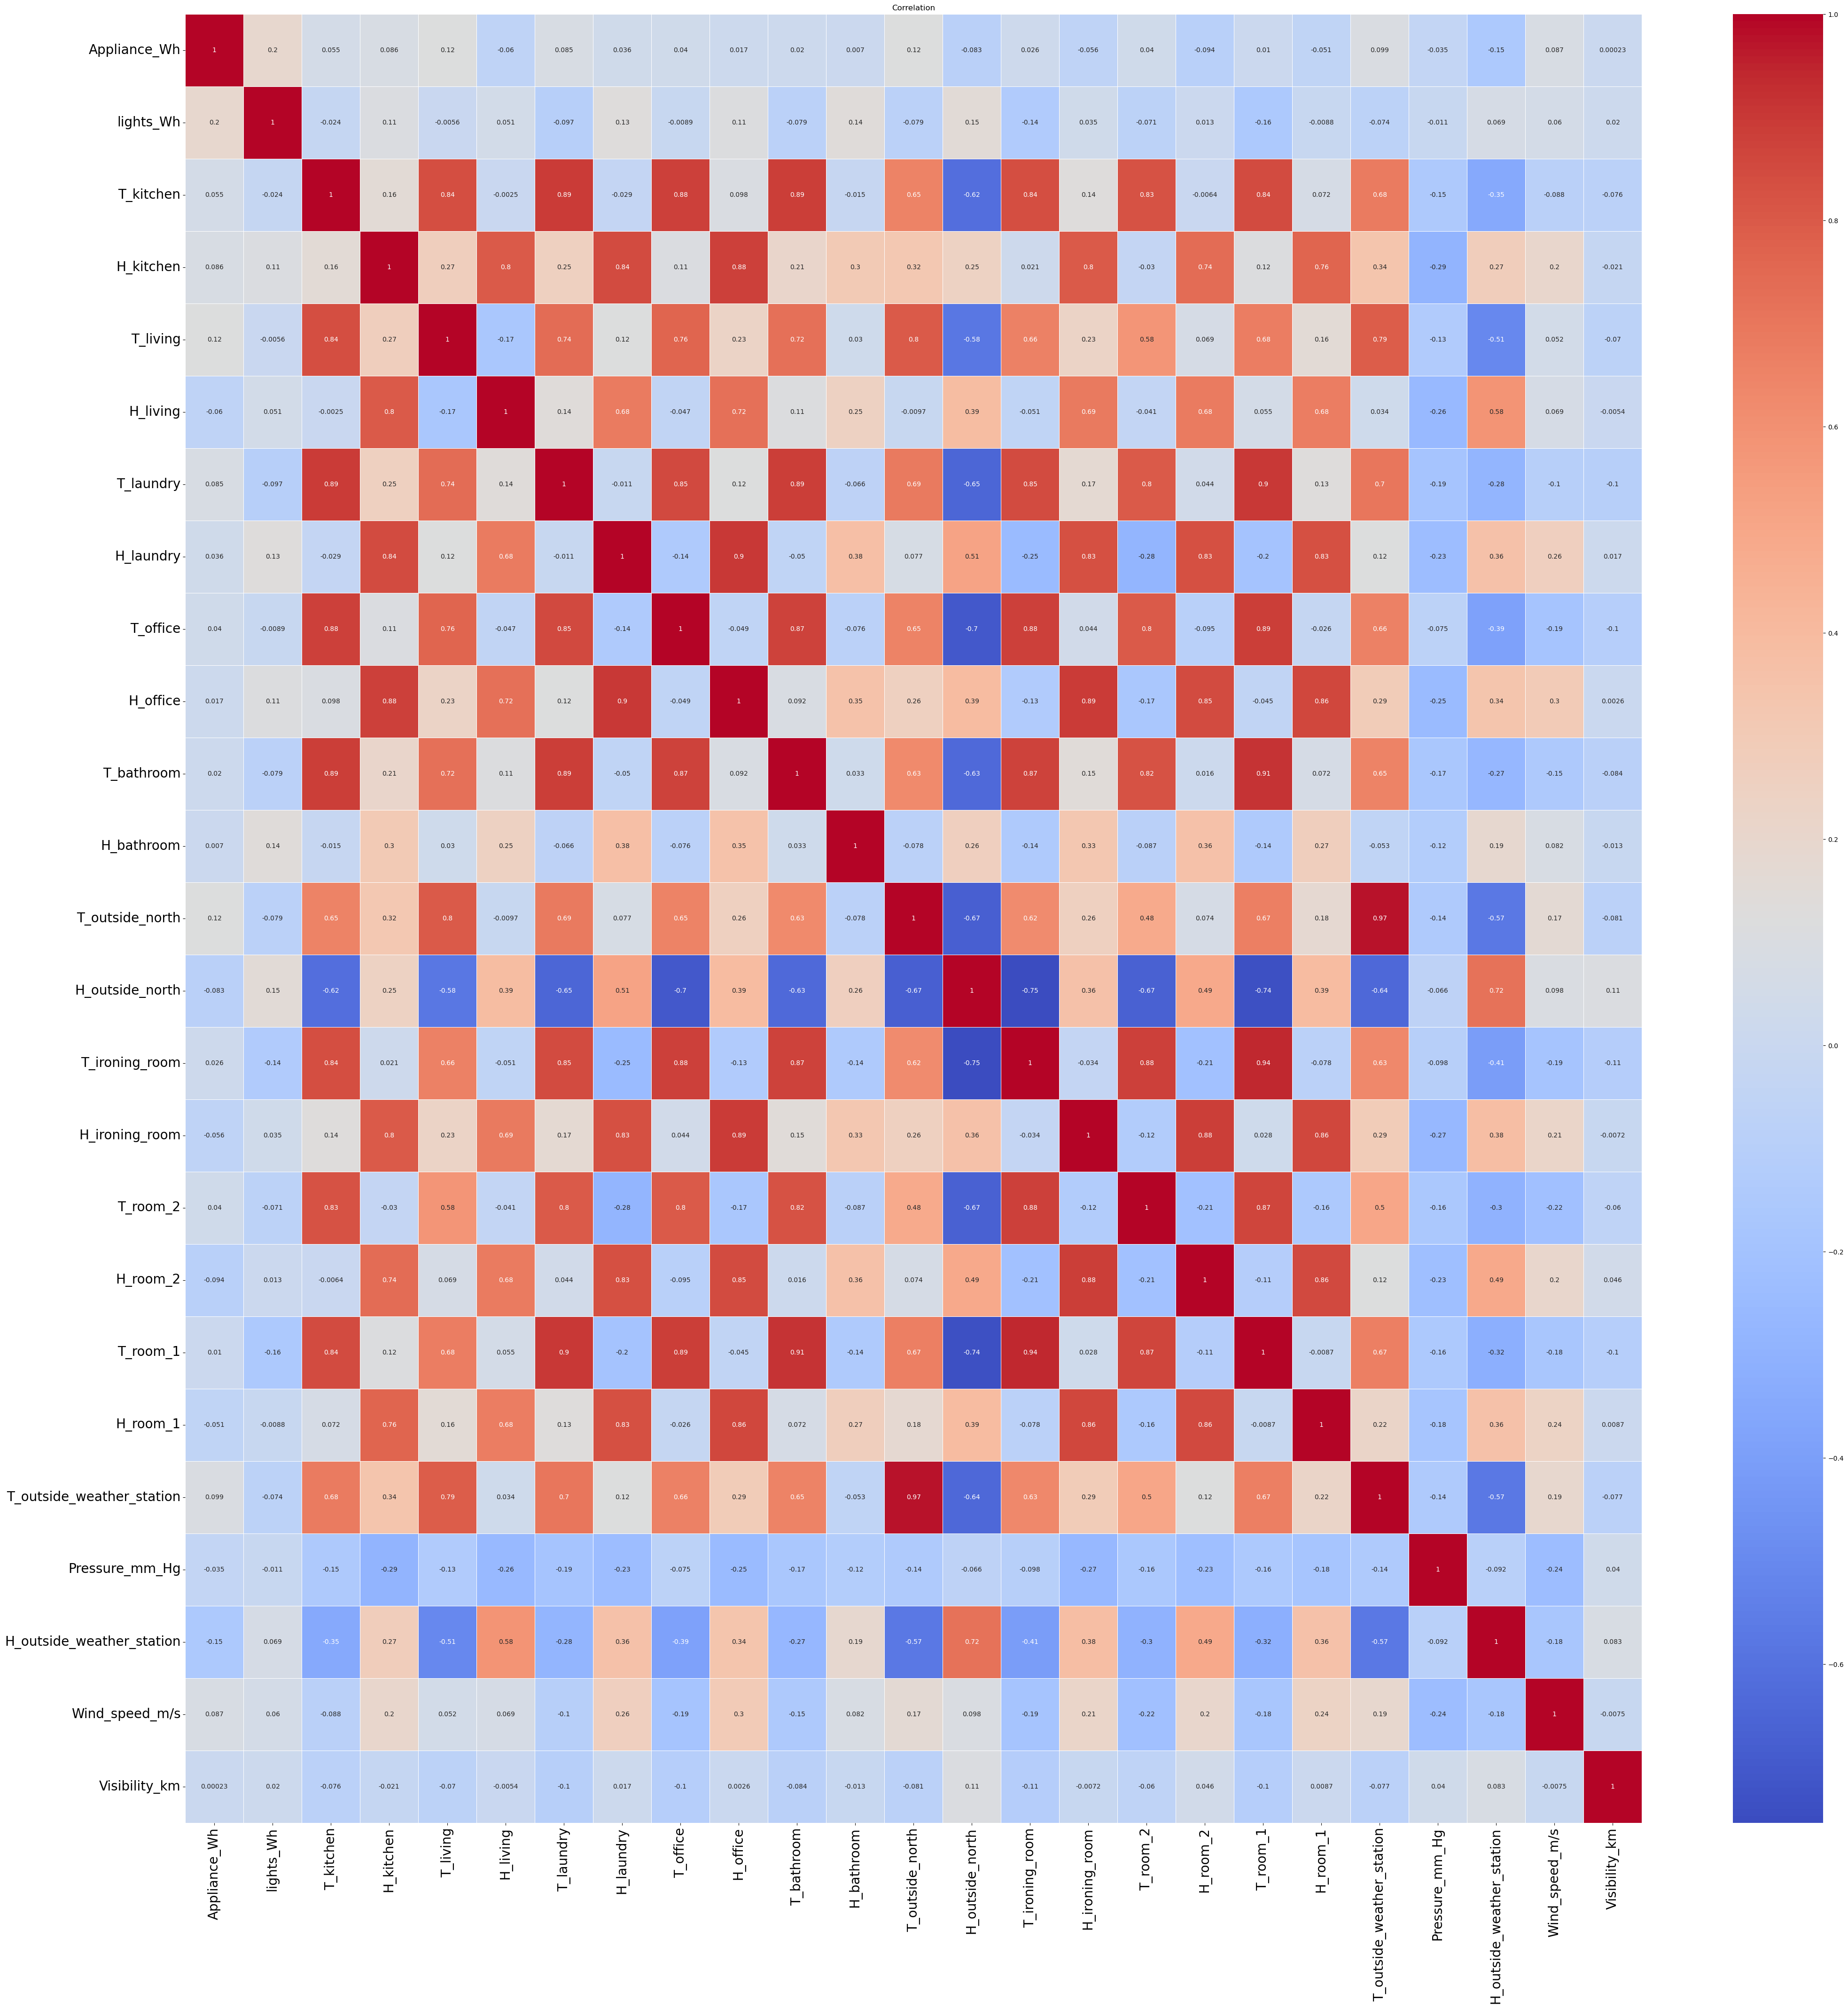

In [11]:
correlation_matrix = df.corr()
plt.figure(figsize=(50,50))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation')
plt.yticks(rotation=0,fontsize=20)
plt.xticks(fontsize=20);


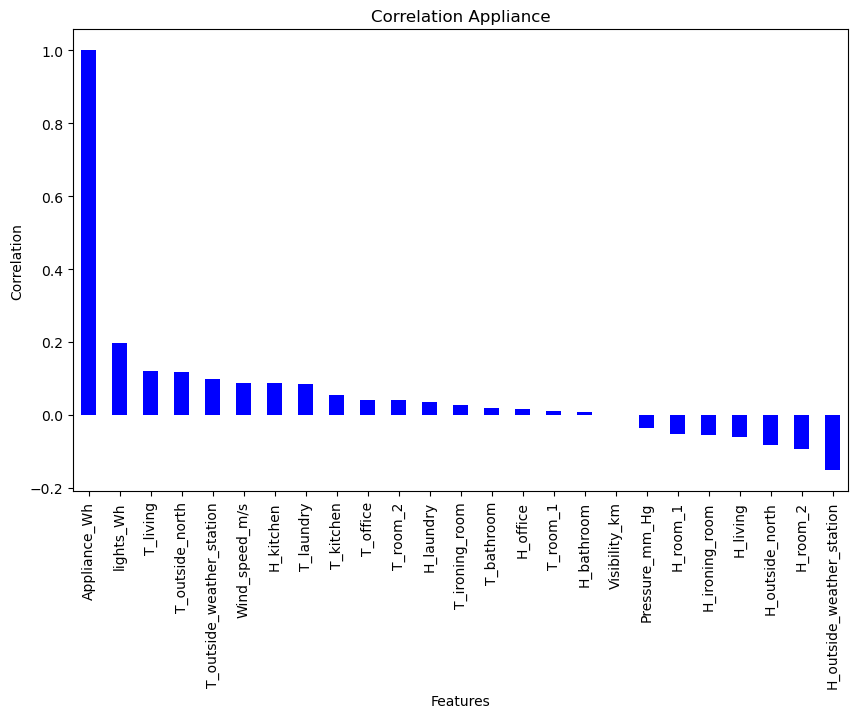

In [12]:
appliance_correlation= correlation_matrix['Appliance_Wh'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
appliance_correlation.plot(kind='bar', color='b')
plt.title('Correlation Appliance')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

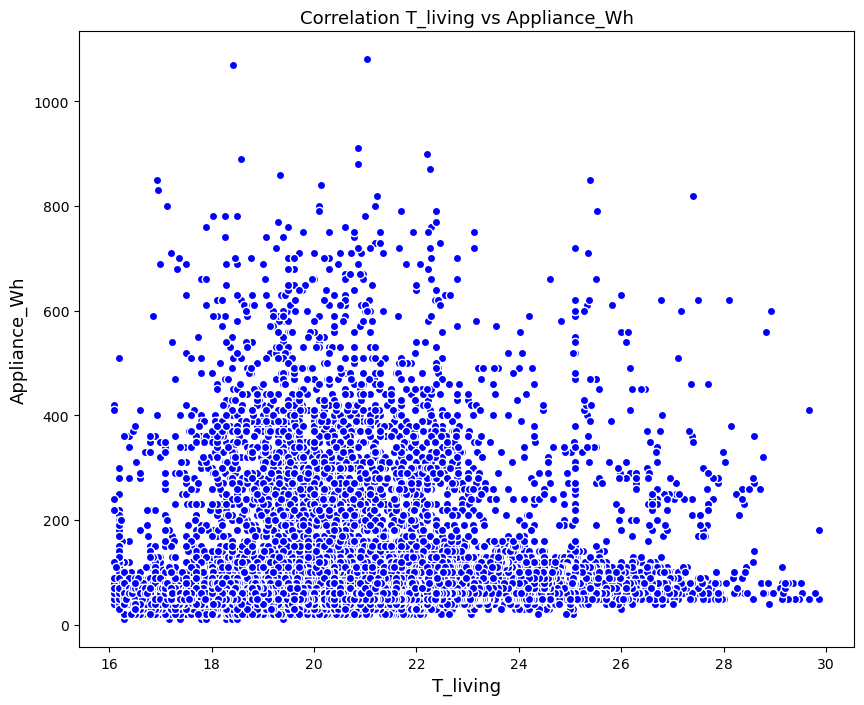

In [13]:
plt.figure(figsize=(10,8))
plt.plot("T_living","Appliance_Wh", data=df, color="blue", linestyle="none", marker="o", markeredgecolor="white")

plt.title("Correlation T_living vs Appliance_Wh",fontsize=13)
plt.xlabel("T_living",fontsize=13)
plt.ylabel("Appliance_Wh",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

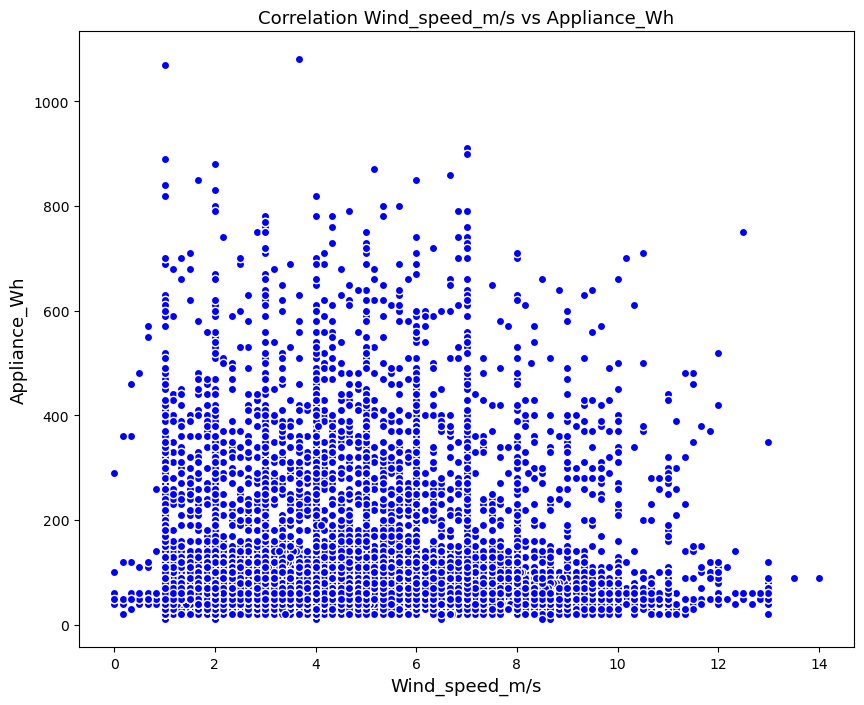

In [14]:
plt.figure(figsize=(10,8))
plt.plot("Wind_speed_m/s","Appliance_Wh", data=df, color="blue", linestyle="none", marker="o", markeredgecolor="white")

plt.title("Correlation Wind_speed_m/s vs Appliance_Wh",fontsize=13)
plt.xlabel("Wind_speed_m/s",fontsize=13)
plt.ylabel("Appliance_Wh",fontsize=13);

plt.yticks(fontsize=10)
plt.xticks(fontsize=10);

## Data Standardization: StandardScaler

In [15]:
scaler=StandardScaler()

In [16]:
df[['Appliance_Wh_S','lights_Wh_S','T_kitchen_S','H_kitchen_S','T_living_S','H_living_S','T_laundry_S','H_laundry_S','T_office_S','H_office_S',
   'T_bathroom_S','H_bathroom_S','T_outside_north_S','H_outside_north_S','T_ironing_room_S','H_ironing_room_S','T_room_2_S','H_room_2_S',
   'T_room_1_S','H_room_1_S','T_outside_weather_station_S','Pressure_mm_Hg_S','H_outside_weather_station_S','Wind_speed_m/s_S',
   'Visibility_km_S']]= scaler.fit_transform(df[['Appliance_Wh','lights_Wh','T_kitchen','H_kitchen','T_living','H_living','T_laundry','H_laundry','T_office','H_office',
   'T_bathroom','H_bathroom','T_outside_north','H_outside_north','T_ironing_room','H_ironing_room','T_room_2','H_room_2',
   'T_room_1','H_room_1','T_outside_weather_station','Pressure_mm_Hg','H_outside_weather_station','Wind_speed_m/s',
   'Visibility_km']])

In [17]:
df

,Appliance_Wh,lights_Wh,T_kitchen,H_kitchen,T_living,H_living,T_laundry,H_laundry,T_office,H_office,T_bathroom,H_bathroom,T_outside_north,H_outside_north,T_ironing_room,H_ironing_room,T_room_2,H_room_2,T_room_1,H_room_1,T_outside_weather_station,Pressure_mm_Hg,H_outside_weather_station,Wind_speed_m/s,Visibility_km,Appliance_Wh_S,lights_Wh_S,T_kitchen_S,H_kitchen_S,T_living_S,H_living_S,T_laundry_S,H_laundry_S,T_office_S,H_office_S,T_bathroom_S,H_bathroom_S,T_outside_north_S,H_outside_north_S,T_ironing_room_S,H_ironing_room_S,T_room_2_S,H_room_2_S,T_room_1_S,H_room_1_S,T_outside_weather_station_S,Pressure_mm_Hg_S,H_outside_weather_station_S,Wind_speed_m/s_S,Visibility_km_S
0,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,-3.7e-01,3.3,-1.1,1.8,-0.5,1.1,-1.2,1.7,-0.9,1.5,-1.3,0.5,-0.1,1.0,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.2e+00,2.1
1,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,-3.7e-01,3.3,-1.1,1.6,-0.5,1.1,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.1e+00,1.8
2,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,-4.7e-01,3.3,-1.1,1.5,-0.5,1.0,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-2.9e+00,0.8,9.4e-01,1.4
3,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5,-4.7e-01,4.6,-1.1,1.5,-0.5,1.0,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,8.0e-01,1.1
4,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,-3.7e-01,4.6,-1.1,1.5,-0.5,1.0,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.3,1.0,-1.5,1.1,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,6.6e-01,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.6,46.6,25.9,42.0,27.2,41.2,24.7,45.6,23.2,52.4,24.8,1.0,24.5,44.5,24.7,50.1,23.2,46.8,22.7,755.2,55.7,3.3,23.7,2.2e-02,-0.5,2.4,1.6,2.5,0.4,2.5,0.6,1.9,1.5,2.0,0.2,2.8,-1.7,2.0,1.8,1.4,1.4,1.8,1.3,2.9,-4.4e-02,-1.6,-2.9e-01,-1.2
19731,90,0,25.5,46.5,25.8,42.1,27.1,41.2,24.7,45.6,23.2,52.3,24.2,1.0,24.6,44.4,24.7,49.8,23.2,46.8,22.6,755.2,56.0,3.5,24.5,-7.5e-02,-0.5,2.4,1.6,2.5,0.4,2.4,0.6,1.9,1.5,2.0,0.2,2.7,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.9,-4.4e-02,-1.6,-2.2e-01,-1.2
19732,270,10,25.5,46.6,25.6,42.8,27.1,41.7,24.7,45.7,23.2,52.3,23.6,1.0,24.5,44.4,24.7,49.7,23.2,46.8,22.5,755.2,56.3,3.7,25.3,1.7e+00,0.8,2.4,1.6,2.4,0.6,2.4,0.8,1.9,1.5,2.0,0.1,2.6,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.8,-4.4e-02,-1.6,-1.5e-01,-1.1
19733,420,10,25.5,47.0,25.4,43.0,26.9,41.3,24.7,45.8,23.2,52.2,22.4,1.0,24.5,44.3,24.7,49.5,23.2,46.8,22.3,755.2,56.7,3.8,26.2,3.1e+00,0.8,2.4,1.7,2.3,0.6,2.3,0.6,1.9,1.6,2.0,0.1,2.4,-1.7,2.0,1.7,1.3,1.3,1.8,1.3,2.8,-4.4e-02,-1.5,-8.4e-02,-1.0


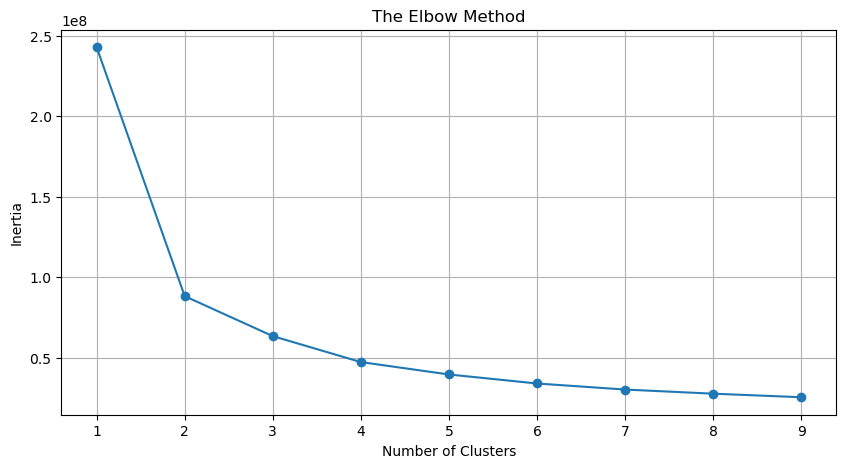

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def optimise_k_means(df, max_k):
    means = []
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(df)
        
        means.append(k)
        inertia.append(kmeans.inertia_)

    # Generate the elbow plot
    fig, ax = plt.subplots(figsize=(10, 5))

    plt.plot(means, inertia, 'o-')

    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    
optimise_k_means(df, max_k=10)

## Applying K-means clustering


In [19]:
# Applying KMeans to the dataset/ Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, max_iter = 300, n_init = 10, random_state = 38)

In [20]:
kmeans.fit(df[['T_outside_weather_station_S','Appliance_Wh_S']])

KMeans(n_clusters=3, n_init=10, random_state=38)

In [21]:
df['kmeans_3']=kmeans.labels_

In [22]:
df

,Appliance_Wh,lights_Wh,T_kitchen,H_kitchen,T_living,H_living,T_laundry,H_laundry,T_office,H_office,T_bathroom,H_bathroom,T_outside_north,H_outside_north,T_ironing_room,H_ironing_room,T_room_2,H_room_2,T_room_1,H_room_1,T_outside_weather_station,Pressure_mm_Hg,H_outside_weather_station,Wind_speed_m/s,Visibility_km,...,lights_Wh_S,T_kitchen_S,H_kitchen_S,T_living_S,H_living_S,T_laundry_S,H_laundry_S,T_office_S,H_office_S,T_bathroom_S,H_bathroom_S,T_outside_north_S,H_outside_north_S,T_ironing_room_S,H_ironing_room_S,T_room_2_S,H_room_2_S,T_room_1_S,H_room_1_S,T_outside_weather_station_S,Pressure_mm_Hg_S,H_outside_weather_station_S,Wind_speed_m/s_S,Visibility_km_S,kmeans_3
0,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,...,3.3,-1.1,1.8,-0.5,1.1,-1.2,1.7,-0.9,1.5,-1.3,0.5,-0.1,1.0,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.2e+00,2.1,0
1,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,...,3.3,-1.1,1.6,-0.5,1.1,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.1e+00,1.8,0
2,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,...,3.3,-1.1,1.5,-0.5,1.0,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-2.9e+00,0.8,9.4e-01,1.4,0
3,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5,...,4.6,-1.1,1.5,-0.5,1.0,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,8.0e-01,1.1,0
4,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,...,4.6,-1.1,1.5,-0.5,1.0,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.3,1.0,-1.5,1.1,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,6.6e-01,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.6,46.6,25.9,42.0,27.2,41.2,24.7,45.6,23.2,52.4,24.8,1.0,24.5,44.5,24.7,50.1,23.2,46.8,22.7,755.2,55.7,3.3,23.7,...,-0.5,2.4,1.6,2.5,0.4,2.5,0.6,1.9,1.5,2.0,0.2,2.8,-1.7,2.0,1.8,1.4,1.4,1.8,1.3,2.9,-4.4e-02,-1.6,-2.9e-01,-1.2,1
19731,90,0,25.5,46.5,25.8,42.1,27.1,41.2,24.7,45.6,23.2,52.3,24.2,1.0,24.6,44.4,24.7,49.8,23.2,46.8,22.6,755.2,56.0,3.5,24.5,...,-0.5,2.4,1.6,2.5,0.4,2.4,0.6,1.9,1.5,2.0,0.2,2.7,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.9,-4.4e-02,-1.6,-2.2e-01,-1.2,1
19732,270,10,25.5,46.6,25.6,42.8,27.1,41.7,24.7,45.7,23.2,52.3,23.6,1.0,24.5,44.4,24.7,49.7,23.2,46.8,22.5,755.2,56.3,3.7,25.3,...,0.8,2.4,1.6,2.4,0.6,2.4,0.8,1.9,1.5,2.0,0.1,2.6,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.8,-4.4e-02,-1.6,-1.5e-01,-1.1,1
19733,420,10,25.5,47.0,25.4,43.0,26.9,41.3,24.7,45.8,23.2,52.2,22.4,1.0,24.5,44.3,24.7,49.5,23.2,46.8,22.3,755.2,56.7,3.8,26.2,...,0.8,2.4,1.7,2.3,0.6,2.3,0.6,1.9,1.6,2.0,0.1,2.4,-1.7,2.0,1.7,1.3,1.3,1.8,1.3,2.8,-4.4e-02,-1.5,-8.4e-02,-1.0,2


## Plotting the Results

''

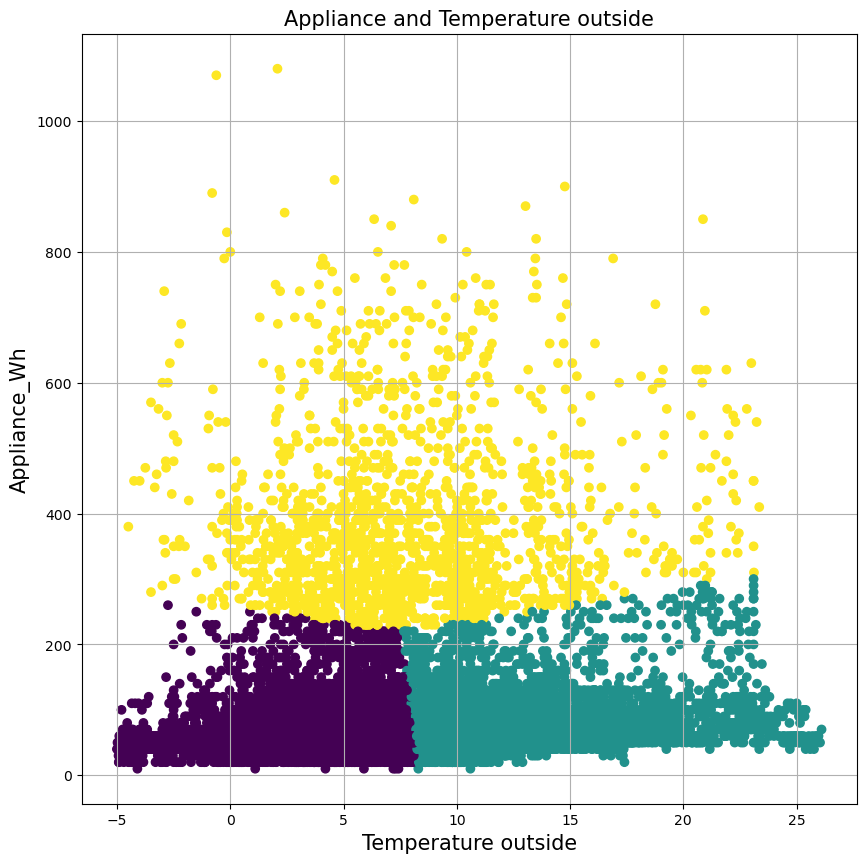

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df['T_outside_weather_station'], y=df['Appliance_Wh'], c=df['kmeans_3']);


plt.title("Appliance and Temperature outside",fontsize=15)
plt.xlabel('Temperature outside',fontsize=15)
plt.ylabel('Appliance_Wh',fontsize=15)

plt.grid(True)

plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
;

## Creating multiple clusters

In [24]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['T_outside_weather_station_S','Appliance_Wh_S']])
    df[f'KMeans_{k}']=kmeans.labels_

In [25]:
df

,Appliance_Wh,lights_Wh,T_kitchen,H_kitchen,T_living,H_living,T_laundry,H_laundry,T_office,H_office,T_bathroom,H_bathroom,T_outside_north,H_outside_north,T_ironing_room,H_ironing_room,T_room_2,H_room_2,T_room_1,H_room_1,T_outside_weather_station,Pressure_mm_Hg,H_outside_weather_station,Wind_speed_m/s,Visibility_km,...,T_laundry_S,H_laundry_S,T_office_S,H_office_S,T_bathroom_S,H_bathroom_S,T_outside_north_S,H_outside_north_S,T_ironing_room_S,H_ironing_room_S,T_room_2_S,H_room_2_S,T_room_1_S,H_room_1_S,T_outside_weather_station_S,Pressure_mm_Hg_S,H_outside_weather_station_S,Wind_speed_m/s_S,Visibility_km_S,kmeans_3,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
0,60,30,19.9,47.6,19.2,44.8,19.8,44.7,19.0,45.6,17.2,55.2,7.0,84.3,17.2,41.6,18.2,48.9,17.0,45.5,6.6,733.5,92.0,7.0,63.0,...,-1.2,1.7,-0.9,1.5,-1.3,0.5,-0.1,1.0,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.2e+00,2.1,0,0,1,1,3,0
1,60,30,19.9,46.7,19.2,44.7,19.8,44.8,19.0,46.0,17.2,55.2,6.8,84.1,17.2,41.6,18.2,48.9,17.1,45.6,6.5,733.6,92.0,6.7,59.2,...,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-3.0e+00,0.8,1.1e+00,1.8,0,0,1,1,3,0
2,50,30,19.9,46.3,19.2,44.6,19.8,44.9,18.9,45.9,17.2,55.1,6.6,83.2,17.2,41.4,18.2,48.7,17.0,45.5,6.4,733.7,92.0,6.3,55.3,...,-1.2,1.7,-0.9,1.6,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,1.0,-0.2,-2.9e+00,0.8,9.4e-01,1.4,0,0,1,1,3,0
3,50,40,19.9,46.1,19.2,44.6,19.8,45.0,18.9,45.7,17.2,55.1,6.4,83.4,17.1,41.3,18.1,48.6,17.0,45.4,6.2,733.8,92.0,6.0,51.5,...,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.2,0.9,-1.5,1.2,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,8.0e-01,1.1,0,0,1,1,3,0
4,60,40,19.9,46.3,19.2,44.5,19.8,45.0,18.9,45.5,17.2,55.1,6.4,84.9,17.2,41.2,18.1,48.6,17.0,45.4,6.1,733.9,92.0,5.7,47.7,...,-1.2,1.8,-1.0,1.5,-1.3,0.5,-0.3,1.0,-1.5,1.1,-2.0,1.1,-1.2,0.9,-0.2,-2.9e+00,0.8,6.6e-01,0.8,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.6,46.6,25.9,42.0,27.2,41.2,24.7,45.6,23.2,52.4,24.8,1.0,24.5,44.5,24.7,50.1,23.2,46.8,22.7,755.2,55.7,3.3,23.7,...,2.5,0.6,1.9,1.5,2.0,0.2,2.8,-1.7,2.0,1.8,1.4,1.4,1.8,1.3,2.9,-4.4e-02,-1.6,-2.9e-01,-1.2,1,0,1,2,2,3
19731,90,0,25.5,46.5,25.8,42.1,27.1,41.2,24.7,45.6,23.2,52.3,24.2,1.0,24.6,44.4,24.7,49.8,23.2,46.8,22.6,755.2,56.0,3.5,24.5,...,2.4,0.6,1.9,1.5,2.0,0.2,2.7,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.9,-4.4e-02,-1.6,-2.2e-01,-1.2,1,0,1,2,2,3
19732,270,10,25.5,46.6,25.6,42.8,27.1,41.7,24.7,45.7,23.2,52.3,23.6,1.0,24.5,44.4,24.7,49.7,23.2,46.8,22.5,755.2,56.3,3.7,25.3,...,2.4,0.8,1.9,1.5,2.0,0.1,2.6,-1.7,2.0,1.8,1.4,1.3,1.8,1.3,2.8,-4.4e-02,-1.6,-1.5e-01,-1.1,1,0,0,2,2,3
19733,420,10,25.5,47.0,25.4,43.0,26.9,41.3,24.7,45.8,23.2,52.2,22.4,1.0,24.5,44.3,24.7,49.5,23.2,46.8,22.3,755.2,56.7,3.8,26.2,...,2.3,0.6,1.9,1.6,2.0,0.1,2.4,-1.7,2.0,1.7,1.3,1.3,1.8,1.3,2.8,-4.4e-02,-1.5,-8.4e-02,-1.0,2,0,0,0,0,2


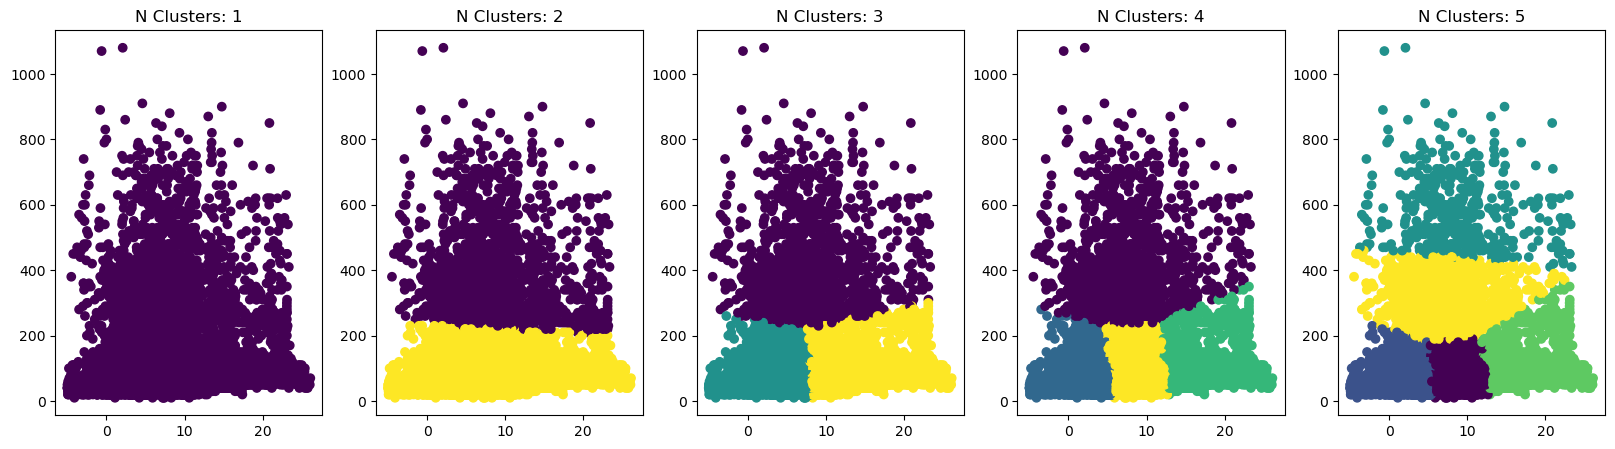

In [26]:
fig, axs=plt.subplots(nrows=1,ncols=5, figsize=(20,5))

for i, ax in enumerate (fig.axes, start=1):
    ax.scatter(x=df['T_outside_weather_station'], y=df['Appliance_Wh'], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')